#### Content
* [Data Preprocessing](#1)
    * [Import Libraries](#2)
    * [Import Dataset](#3)
    * [Encoding Categorical Data](#4)
    * [Create test and train data (and x-y variables)](#5)
    * [Feature Scaling](#6)
* [Model Building](#7)
    * [Implementing Basic Example ANN Structure with OOP](#8)
    * [Fitting Model and Prediction](#9)
    * [Building ANN Structure with Keras Library](#10)
        * [Import Libraries](#11)
        * [Initialize ANN Model](#12)
        * [Adding the Layers](#13)
        * [Compiling the ANN](#14)
        * [Fitting the ANN](#15)
        * [Making Prediction with Test Data](#16)
        * [Accuracy Score and Loss Visualization](#17)
    

<a id = "1"></a>
### Data Preprocessing
<a id = "2"></a>
#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id = "3"></a>
#### Import Dataset

In [2]:
# It's already splitted as train and test data. So we had better import them train_data and test_data

train_data = pd.read_csv("../input/disease-prediction-using-machine-learning/Training.csv")
test_data = pd.read_csv("../input/disease-prediction-using-machine-learning/Testing.csv")

In [3]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


Data has 134 columns. The 132 of the columns are symptoms, encoded integer data, and the "prognosis" column is categorical data for disease labels.

In [5]:
train_data.isnull().any()  #there is an unclean column named "Unnamed: 133". We will drop it

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Unnamed: 133             True
Length: 134, dtype: bool

In [6]:
# we dont need Unnamed: 133 column to train
train_data.drop(["Unnamed: 133"], axis = 1, inplace = True)

In [7]:
train_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


<a id = "4"></a>
#### Encoding Categorical Data

The data is already encoded but anyhow I will show how to encode categorical data.

In [8]:
# Label Encoding
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()

# Lets assume we have categorical labels at first column (itching). If this column has True-False values or like Male-Female,
# then it will tranform into 1-0 encoding. This is encoding. But as I say before, there is no need for encoding on this dataset

# train_data.loc[:, 0] = labelencoder.fit_transform(train_data.iloc[:, 0])
# train_data

In [9]:
# One hot encoding
# from sklearn.preprocessing import OneHotEncoder

# Lets assume our second column (skin_rash) has more than two labels. This time, we will have to one hot encode the feature
# First, we need to apply label encoding similarly as we did in the itching variable
# After applying label encoding, now it's time to appy One Hot Encoding

# onehotencoder = OneHotEncoder(categorical_features = [1])
# labelencoder2 = LabelEncoder()
# train_data.loc[:,1] = labelencoder2.fit_transform(train_data.iloc[:, 1])
# train_data = onehotencoder.fit_transform(train_data).toarray()

<a id = "5"></a>
#### Create Test and Train Data

In [10]:
X_train = train_data.iloc[:, :-1]
X_test = test_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1:]
y_test = test_data.iloc[:, -1:]

In [11]:
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)

X train shape:  (4920, 132)
y train shape:  (4920, 1)


* Our x train data has 132 features and 4920 observation unit that means our input matrix has 4920 rows and 132 columns for training
* Our y train data has one feature (itself) and 4920 observation unit that means our output matrix has 4920 rows and 1 column for training

In [12]:
print("X test shape: ",X_test.shape)
print("y test shape: ",y_test.shape)

X test shape:  (42, 132)
y test shape:  (42, 1)


* Our x test data has 132 features and 42 observation unit that means our input matrix has 42 rows and 132 columns for prediction
* Our y test data has one feature (itself) and 42 observation unit that means our output matrix has 42 rows and 1 column for prediction

<a id = "6"></a>
#### Feature Scaling for Numerical Data

<img src= "https://miro.medium.com/max/758/1*wuCX1bjSh6YXcu8tuA5wyw.png" alt ="Standardization and Normalization">

In [13]:
# Example of standardization and normalization

x = np.array([1,23,5,564,56,876,7,-123])

standardized_X = (x - np.mean(x)) / np.std(x)
normalized_X = (x-np.min(x) / np.max(x) - np.min(x))
print("Standardized array: ",standardized_X)
print("Normalized array: ",normalized_X )

Standardized array:  [-0.53531619 -0.46806733 -0.52308913  1.18564322 -0.36719405  2.13935429
 -0.5169756  -0.91435521]
Normalized array:  [1.24140411e+02 1.46140411e+02 1.28140411e+02 6.87140411e+02
 1.79140411e+02 9.99140411e+02 1.30140411e+02 1.40410959e-01]


In [14]:
# With sklearn scalers
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
x = x.reshape(-1,1)  # for sklearn methods. they use two dimensional vectors
x = stds.fit_transform(x)

What if we apply standard scaling to our train symptoms data (X_train)?
* This is a nonsensical situation because our symptoms are not numerical. They are categorical. So do not these bullshit =)

<a id = "7"></a>
### Model Building
<a id = "8"></a>
#### Implementing Basic Example ANN Structure with OOP

Reference: https://www.geeksforgeeks.org/implementing-ann-training-process-in-python/

<img src= "https://media.geeksforgeeks.org/wp-content/uploads/input_set.png" alt ="Basic ANN">

In [15]:
class NeuralNet(object):
    def __init__(self):
        # Generate random numbers
        np.random.seed(1)
        
        # Assign random weights to a 3 * 1 matrix
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1
        
    # The sigmoid function method
    def _sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    # Derivative sigmoid
    def derivative_sigmoid(self, x):
        return x * (1 - x)
    
    # Train the neural network and adjust the weights each time
    def train(self, inputs, outputs, iteration_number):
        for iteration in range(iteration_number):     
        
            # Pass the training set through network
            output = self.learn(inputs)
        
            # Calculate the error
            error = outputs - output
        
            # Adjust the weights by a factor
            factor = np.dot(inputs.T, error * self.derivative_sigmoid(output))
            self.synaptic_weights += factor
        
    # calculate z    
    def learn(self, test_inputs):
        return self._sigmoid(np.dot(test_inputs, self.synaptic_weights))

<a id = "9"></a>
#### Fitting Model and Prediction

In [16]:
# Initialize
neural_net = NeuralNet()

# The training set
inputs = np.array([[0, 1, 1], [1, 0, 0], [1, 0, 1]])
outputs = np.array([[1, 0, 1]]).T

# train the neural network
neural_net.train(inputs, outputs, 50)

test_inputs = np.array([1, 0, 1])
threshold = 0.5
if neural_net.learn(test_inputs) >= threshold:
    print("Our test example output is: 1")
else:
    print("Our test example output is: 0")

Our test example output is: 1


In [17]:
# transform into dummies for y_train (prognosis variable)
y_train_dum = pd.get_dummies(y_train)
y_train_dum

,prognosis_(vertigo) Paroymsal Positional Vertigo,prognosis_AIDS,prognosis_Acne,prognosis_Alcoholic hepatitis,prognosis_Allergy,prognosis_Arthritis,prognosis_Bronchial Asthma,prognosis_Cervical spondylosis,prognosis_Chicken pox,prognosis_Chronic cholestasis,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<a id = "10"></a>
### Building ANN Structure with Keras Library
<a id = "11"></a>
#### Import Libraries

In [18]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow.keras.models import Sequential   # used for initialize ANN model
from tensorflow.keras import layers   # used for different layer structure
from tensorflow.keras.layers import Dense

2021-09-20 12:52:37.305173: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-20 12:52:37.305297: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<a id = "12"></a>
#### Initialize the ANN Model

In [19]:
classifier = Sequential()

2021-09-20 12:52:41.834599: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-20 12:52:41.837647: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-20 12:52:41.837683: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-20 12:52:41.837708: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (07f80031a33a): /proc/driver/nvidia/version does not exist
2021-09-20 12:52:41.838058: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

<a id = "13"></a>
#### Adding the Layers

In [20]:
# adding first hidden layer with input layer. there is init parameter that represents how to initialize weights
classifier.add(Dense(64, activation = "relu", input_dim = X_train.shape[1]))
# adding second hidden layer
classifier.add(Dense(32, activation = "relu"))
# adding last layer
classifier.add(Dense(y_train_dum.shape[1], activation = "softmax"))

<a id = "14"></a>
#### Compiling the ANN Model

In [21]:
classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                8512      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 41)                1353      
Total params: 11,945
Trainable params: 11,945
Non-trainable params: 0
_________________________________________________________________


<a id = "15"></a>
#### Fitting the ANN

In [22]:
history = classifier.fit(X_train, y_train_dum, epochs = 5, batch_size = 30)

2021-09-20 12:52:42.526597: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-20 12:52:42.541399: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/5
164/164 [==============================] - 1s 1ms/step - loss: 3.1854 - accuracy: 0.3724
Epoch 2/5
164/164 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 1.0000
Epoch 3/5
164/164 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 1.0000
Epoch 4/5
164/164 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 5/5
164/164 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 1.0000


<a id = "16"></a>
#### Making Prediction

In [23]:
prediction = classifier.predict_classes(X_test)
prediction

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 27])

<a id = "17"></a>
#### Accuracy and Loss Visualization

In [24]:
history.history["accuracy"]

[0.6414633989334106, 1.0, 1.0, 1.0, 1.0]

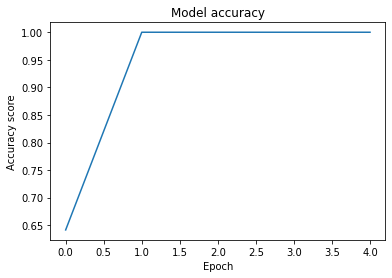

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()

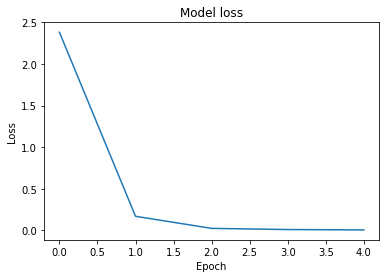

In [26]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()